Importação dos dados que estão presente em um repositório no Github no formato de arquivos .csv

In [ ]:
import pandas as pd
import numpy as np
import pywt

In [ ]:
x1 = pd.read_csv('https://github.com/ascdavia/DeepLearning_SignalProcessing-sEMG/blob/main/Database/sEMG_Basic_Hand_movements_upatras/Database_1/df1_mov_all.csv?raw=true', compression = None)
x = x1.drop(x1.columns[0], axis=1)

In [ ]:
x = x.values.reshape(x.shape[0], x.shape[1], 1) #comando necessário para colocar a matriz de entrada x em um formato compatível com os neurônios de um CNN. Neste caso, foi necessário fazer uma camada de profundidade igual a 1.
print(x.shape)

(1800, 1501, 1)


Definição da matriz de saída *y*

In [ ]:
base = np.ones((150,1), dtype=np.int64)
mov_cyl = base*0
mov_hook = base*1
mov_lat = base*2
mov_palm = base*3
mov_spher = base*4
mov_tip = base*5

In [ ]:
mov = np.vstack([mov_cyl,mov_hook,mov_lat,mov_palm,mov_spher,mov_tip])
y = pd.DataFrame(mov)

Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
x_train.shape

(1206, 1501, 1)

In [ ]:
y_train.shape

(1206, 1)

In [ ]:
x_test.shape

(594, 1501, 1)

In [ ]:
y_test.shape

(594, 1)


CNN 1D - MODELO 1

In [ ]:
import keras
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import GlobalAveragePooling1D
from keras.layers import Flatten

from keras.utils.vis_utils import plot_model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1499, 128)         512       
                                                                 
 conv1d_1 (Conv1D)           (None, 1497, 128)         49280     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 748, 128)         0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 744, 64)           41024     
                                                                 
 conv1d_3 (Conv1D)           (None, 740, 64)           20544     
                                                                 
 flatten (Flatten)           (None, 47360)             0         
                                                        

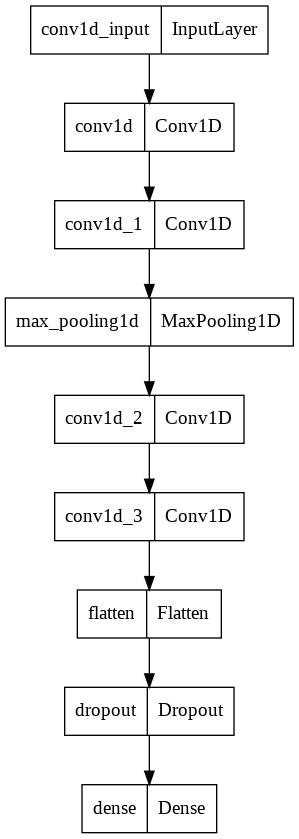

In [ ]:
num_classes = 6

model = keras.models.Sequential()
model.add(Conv1D(128, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D())
model.add(Conv1D(64, kernel_size=5, activation='relu'))
model.add(Conv1D(64, kernel_size=5, activation='relu'))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

plot_model(model, to_file='model.png')

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
treino = model.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
38/38 [==============================] - 24s 617ms/step - loss: 1.6100 - accuracy: 0.2570
Epoch 2/10
38/38 [==============================] - 25s 647ms/step - loss: 1.4070 - accuracy: 0.3491
Epoch 3/10
38/38 [==============================] - 25s 652ms/step - loss: 1.1974 - accuracy: 0.4768
Epoch 4/10
38/38 [==============================] - 23s 614ms/step - loss: 0.9000 - accuracy: 0.6285
Epoch 5/10
38/38 [==============================] - 23s 612ms/step - loss: 0.5657 - accuracy: 0.7778
Epoch 6/10
38/38 [==============================] - 23s 615ms/step - loss: 0.3772 - accuracy: 0.8483
Epoch 7/10
38/38 [==============================] - 23s 613ms/step - loss: 0.2523 - accuracy: 0.9245
Epoch 8/10
38/38 [==============================] - 23s 614ms/step - loss: 0.1403 - accuracy: 0.9594
Epoch 9/10
38/38 [==============================] - 23s 616ms/step - loss: 0.1267 - accuracy: 0.9677
Epoch 10/10
38/38 [==============================] - 24s 618ms/step - loss: 0.0755 - accura

In [ ]:
avaliacao = model.evaluate(x_train,y_train)

38/38 [==============================] - 6s 163ms/step - loss: 0.0170 - accuracy: 0.9975


Avaliação do Modelo via Matriz de Confusão

In [ ]:
from sklearn.metrics import confusion_matrix

pred = model.predict(x_test)
y_pred = pred.argmax(axis=-1)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[39 17  7  8 12  8]
 [18 64  3  2 24  1]
 [13 10 41  5  1 21]
 [16  8 21 20 12 16]
 [24 37  2  4 43  5]
 [14  4 33  9  1 31]]


In [ ]:
qualidade = cm.diagonal()/cm.sum(axis=1)
qualidade

array([0.42857143, 0.57142857, 0.45054945, 0.21505376, 0.37391304,
       0.33695652])

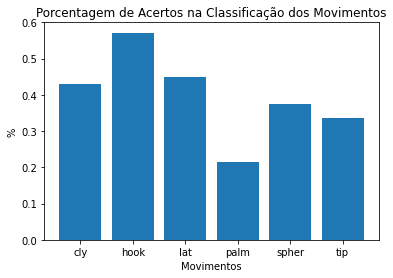

In [ ]:
import matplotlib.pyplot as plt

grupos = ['cly', 'hook', 'lat', 'palm', 'spher', 'tip']
plt.bar(grupos, qualidade)
plt.xlabel('Movimentos')
plt.ylabel('%')
plt.title('Porcentagem de Acertos na Classificação dos Movimentos')
plt.show()

In [ ]:
desvio = np.std(qualidade)
desvio

0.10918424293595662

In [ ]:
df_cm = pd.DataFrame(cm, range(6),range(6))

In [ ]:
pip install pretty_confusion_matrix

     |████████████████████████████████| 11.2 MB 5.1 MB/s 
     |████████████████████████████████| 103 kB 52.1 MB/s 
     |████████████████████████████████| 197 kB 57.6 MB/s 
     |████████████████████████████████| 73 kB 1.6 MB/s 
     |████████████████████████████████| 156 kB 57.1 MB/s 
     |████████████████████████████████| 843 kB 39.6 MB/s 
     |████████████████████████████████| 41 kB 520 kB/s 
     |████████████████████████████████| 68 kB 6.7 MB/s 
     |████████████████████████████████| 930 kB 57.3 MB/s 
     |████████████████████████████████| 98 kB 7.5 MB/s 
     |████████████████████████████████| 8.8 MB 45.2 MB/s 
     |████████████████████████████████| 596 kB 55.7 MB/s 
     |████████████████████████████████| 461 kB 56.4 MB/s 
  Attempting uninstall: tomli
    Found existing installation: tomli 2.0.1
    Uninstalling tomli-2.0.1:
      Successfully uninstalled tomli-2.0.1
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:


/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:200: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:201: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:203: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:204: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be remo

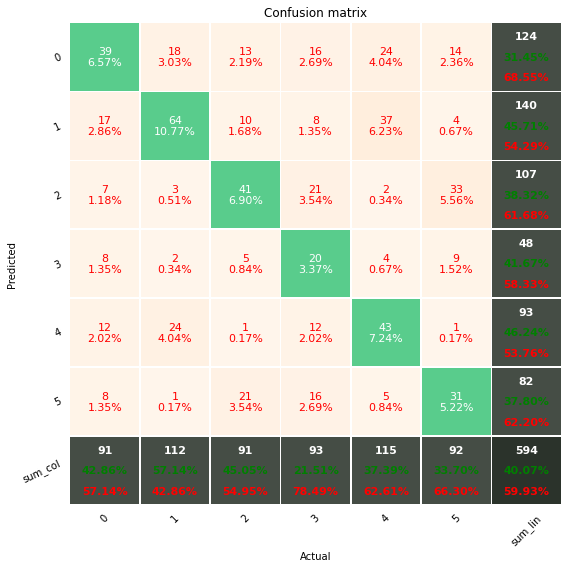

In [ ]:
import numpy as np
from pretty_confusion_matrix import pp_matrix

pp_matrix(df_cm)